# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Ariel Gibranu Athafadillah]
- **Email:** [arieleuy18@gmail.com]
- **ID Dicoding:** [arielgibranu]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan (atau hari libur)?
- Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda pada berbagai kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("D:\\Aa\\dicoding\\idcamp 2024\\Belajar Analisis Data dengan Python\\submission\\data\\Bike-sharing-dataset\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari hasil output di atas, kita dapat melihat beberapa kolom yang ada di dalam dataset tersebut, sebagai berikut:
- instant: Nomor urut baris.
- dteday: Tanggal data diambil.
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan dari 1 hingga 12.
- holiday: 1 jika hari tersebut libur, 0 jika bukan libur.
- weekday: Hari dalam minggu, 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca dalam kode numerik: (1) Cerah, Sedikit awan, Berawan sebagian; (2) Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut; (3) Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan; (4) Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut.
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total penyewaan sepeda.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset berisi 16 kolom dan 731 baris.
- Tidak ada missing value pada dataset tersebut.
- Ada 3 tipe data pada dataset tersebut, yaitu: float64, int64, object.
- kolom dteday bertipe data object, kolom ini kemungkinan merupakan value yang tidak akurat, kolom ini seharusnya bertipe data datetime.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi pada dataset.

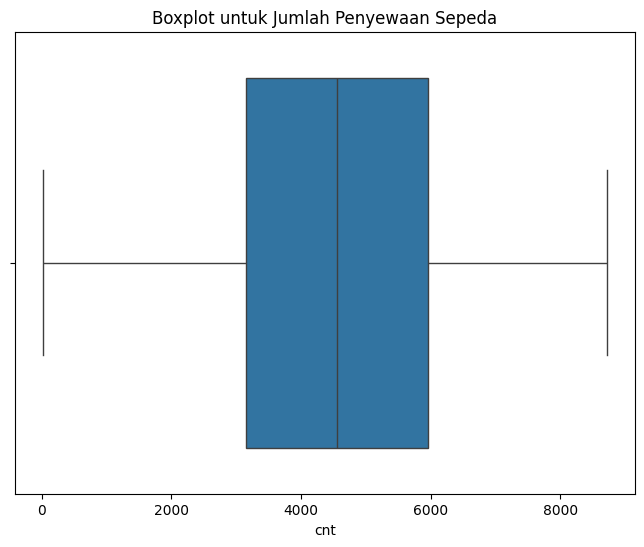

In [6]:
#mencari outlier

plt.figure(figsize=(8, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Tidak ditemukan outlier

### Cleaning Data

In [7]:
#mengubah tipe data dteday ke datetime

# day_df.loc[:, 'dteday'] = pd.to_datetime(day_df['dteday'])

#saya mungkin tidak akan mengubah type data dteday, karena tidak akan digunakan dalam analisis ini

**Insight:**
- Tidak melakukan cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- workingday: rata-rata 0.68, berarti penyewaan sepeda cenderung lebih banyak di hari kerja. weathershit: rata-rata 1.395, berarti penyewaan sepeda lebih banyak saat cuaca cerah.

In [9]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "workingday": ["max", "min", "mean"],
    "weathersit": ["max", "min", "mean"],
    "cnt": "mean"
})

instant workingday               weathersit                        cnt
       nunique        max min      mean        max min      mean         mean
season                                                                       
1          181          1   0  0.662983          3   1  1.408840  2604.132597
2          184          1   0  0.695652          3   1  1.402174  4992.331522
3          188          1   0  0.696809          3   1  1.297872  5644.303191
4          178          1   0  0.679775          3   1  1.477528  4728.162921

**Insight:**
- Rata-rata jumlah penyewaan sepeda setiap musim: (1) semi: 2604.132597; (2) panas: 4992.331522; (3) gugur: 5644.303191; (4) dingin: 4728.162921.
- Rata-rata workingday pada setiap musim berada di angka 0.66 - 0.69. Hal ini menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih banyak saat hari kerja.
- Rata-rata weathersit pada setiap musim berada di angka 1.29 - 1.47. Hal ini menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih banyak saat cuaca cerah
- Nilai maximum pada weathersit adalah 3. Hal ini menunjukkan bahwa tidak ada sama sekali penyewaan sepeda saat weathersit = 4 (cuaca ekstrim)

In [10]:
day_df.groupby(by="workingday")["cnt"].mean()

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

**Insight:**
- Rata-rata jumlah penyewaan sepeda berdasarkan workingday: (0) weekend/libur: 4330.168831; (1) hari kerja: 4584.820000.

In [11]:
day_df.groupby(by="weathersit")["cnt"].mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

**Insight:**
- Rata-rata jumlah penyewaan sepeda berdasarkan weathersit: (1) cuaca cerah/sedikit berawan: 4876.786177; (2) berawan/berkabut: 4035.862348; (3) hujan ringan/salju: 1803.285714; (4) cuaca ekstrim: tidak ada penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [12]:
sewa_sepeda_workingday = day_df.groupby(by="workingday")["cnt"].sum()
print(sewa_sepeda_workingday)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


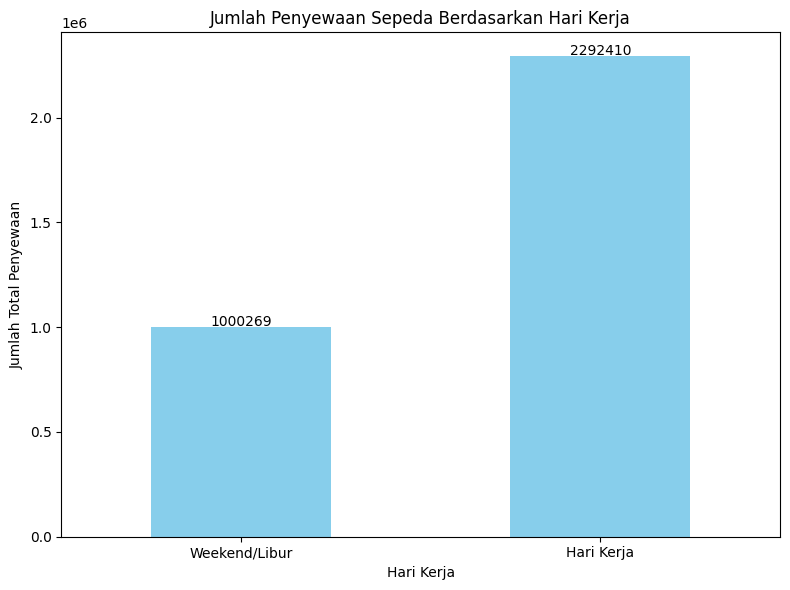

In [13]:
sewa_sepeda_workingday = day_df.groupby(by="workingday")["cnt"].sum()

#buat visualisasi
fig_workingday, ax_workingday = plt.subplots(figsize=(8, 6))
sewa_sepeda_workingday.plot(kind='bar', ax=ax_workingday, color=["skyblue", "skyblue"])
ax_workingday.set_title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
ax_workingday.set_xlabel('Hari Kerja')
ax_workingday.set_ylabel('Jumlah Total Penyewaan')
ax_workingday.set_xticklabels(['Weekend/Libur', 'Hari Kerja'], rotation=0)


# kasih label diatas biar jelas jumlahnya
for p in ax_workingday.patches:
    ax_workingday.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 4),
                           textcoords='offset points')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [14]:
sewa_sepeda_weathersit = day_df.groupby(by="weathersit")["cnt"].sum()
print(sewa_sepeda_weathersit)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


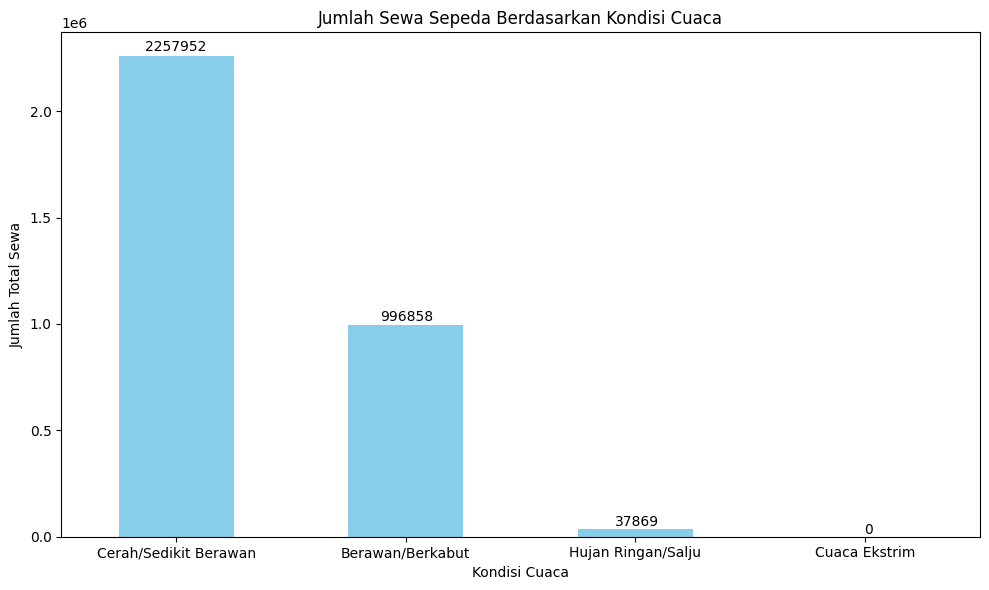

In [15]:
day_df['weathersit'] = pd.Categorical(day_df['weathersit'], categories=[1, 2, 3, 4])

# Menghitung total sewa sepeda berdasarkan kondisi cuaca
sewa_sepeda_weathersit = day_df.groupby(by="weathersit", observed=False)["cnt"].sum()


# Opsi 1: Bar chart dengan pandas .plot()
fig, ax = plt.subplots(figsize=(10, 6))
sewa_sepeda_weathersit.plot(kind='bar', ax=ax, color=["skyblue", "skyblue", "skyblue", "skyblue"])
ax.set_title('Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Jumlah Total Sewa')
ax.set_xticklabels(['Cerah/Sedikit Berawan', 'Berawan/Berkabut', 'Hujan Ringan/Salju', 'Cuaca Ekstrim'], rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005 + p.get_width() / 2, p.get_height() * 1.005), ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Insight:**
- Weekend/Libur: Jumlah penyewaan sepeda 1000269. Hari Kerja: Jumlah penyewaan sepeda lebih tinggi yaitu 2292410.
- Cerah/Sedikit Berawan: Jumlah penyewaan sepeda tinggi yaitu 2257952. Berawan/Berkabut: Jumlah penyewaan sepeda lebih rendah yaitu 996858. Hujan Ringan/Salju: Jumlah penyewaan sepeda sangat rendah yaitu 37869. Cuaca Ekstrim: Tidak ada sama sekali penyewaan sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Penyewaan sepeda lebih tinggi saat hari kerja dibandingkan saat weekend/libur. Perbedaan penyewaan sepeda saat hari kerja dan weekend/libur cukup signifikan.
- Conclution pertanyaan 2: Cuaca yang beragam mempengaruhi jumlah penyewaan sepeda. Jumlah penyewaan sepeda sangat tinggi saat cuaca cerah/sedikit berawan. Saat cuaca berawan/berkabut, jumlah penyewaan sepeda menurun cukup signifikan. Sedangkan saat cuaca Hujan ringan/salju dan cuaca ekstrim jumlah penyewaan sepeda sangat rendah, bahkan di cuaca ekstrim, sama sekali tidak ada penyewaan sepeda.